# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

### Pacotes Utilizados:

In [ ]:
%pip install pyEDFlib
%pip install mne

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

#Definindo padrões de plot domínio do tempo
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [ ]:
import database.databaseutils as db
import reader.edfreader as edfreader
import model.summarymodelconverter as converter

db.connect()

st = db.summary_by_name('chb01_18.edf')
summary_model = converter.model_from_tuple(st)

edf_raw_object = edfreader.raw_data(summary_model)
power_data = edf_raw_object.compute_psd()

In [32]:
edf_raw_object

<RawArray | 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

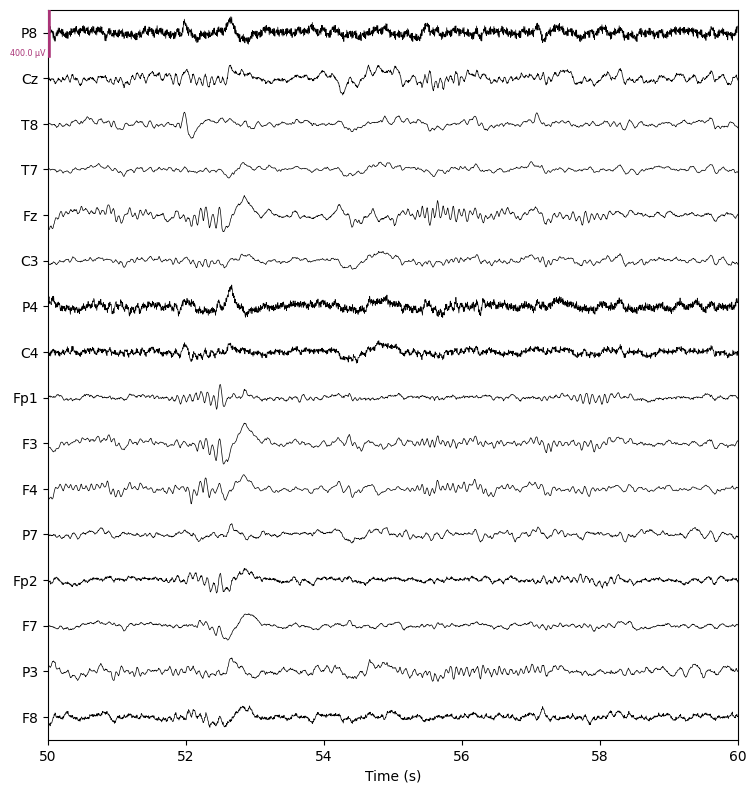

In [40]:
edf_raw_object.plot(start = 50, **plot_kwargs);

In [34]:
power_data

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,18
Number of frequency bins,1025
Frequency range,0.00 – 128.00 Hz


c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


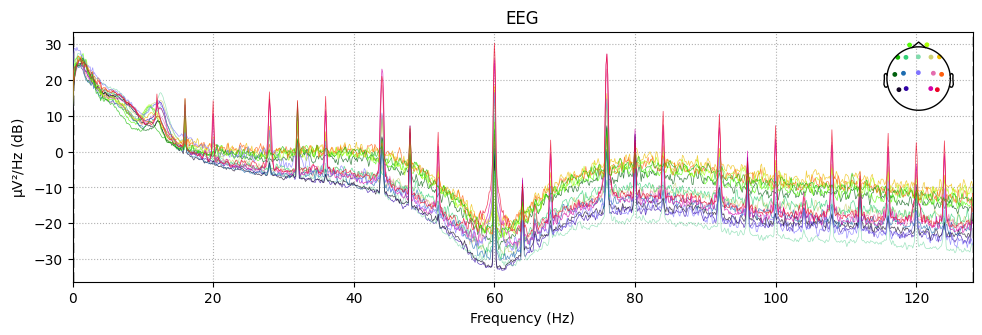

In [39]:
power_data.plot();

In [36]:
import re
import matplotlib.pyplot as plt

replace_dict = {}
drop_list = []
for channel_name in edf_raw_object.info['ch_names']:
    name_change = re.findall('\w+',channel_name)[0].title()
    if name_change in list(replace_dict.values()):
        drop_list.append(channel_name)
    else:
        replace_dict[channel_name] = name_change

edf_raw_object.drop_channels(drop_list)
edf_raw_object.rename_channels(replace_dict)
edf_raw_object.set_montage('standard_1020')

<RawArray | 16 x 921600 (3600.0 s), ~112.5 MB, data loaded>

In [37]:
power_data = edf_raw_object.compute_psd()
power_data

Effective window size : 8.000 (s)


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,16
Number of frequency bins,1025
Frequency range,0.00 – 128.00 Hz


c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


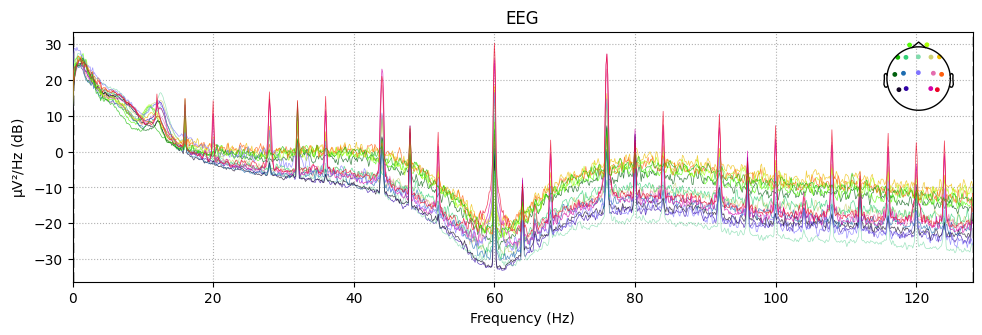

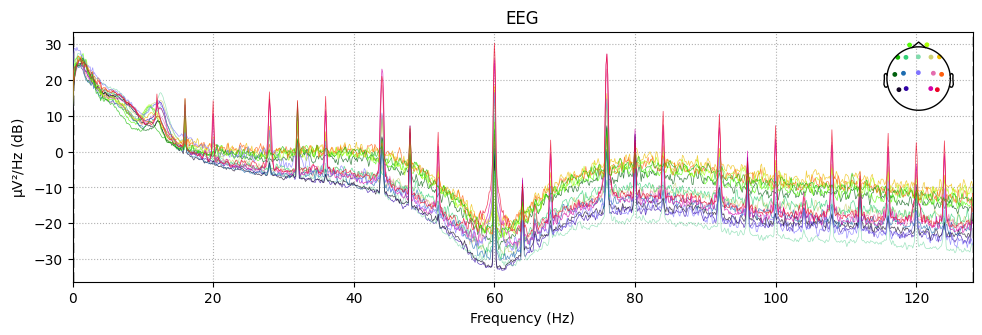

In [38]:
power_data.plot();